In [149]:
import os
import pandas as pd
import tweepy as tw
import time
from textblob import TextBlob
    
consumer_key= 'JK6KzgIcFx4x73RLI3ItGj1TN'
consumer_secret= 'hyjFf2Kg6tbWWXB47aHwQWgdnP3DQFOk7jdSPxe7AkzJCzqXfa'
access_token= '31467843-K2GeCa6pBGaOUvPQdQRnOOgxrGSikeDKj1C3tImr9'
access_token_secret= 'VCrT3mpZrYhdA3VDXM9vVG1WSVTWHE7c0DSyypLMAnRhm'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Define the search term and the date_since date as variables
#Justin - 2020-08-31 - 2020-09-02
#Luke -  2020-09-03 - 2020-09-05

try:
    search_words = ('Biden OR Trump')
    date_since = "2020-09-07"  
    date_until = "2020-09-08"

    # Collect tweets
    tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since,
                  until=date_until,
                  include_rts=False).items(2600)

    # Iterate and print tweets
    users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text, tweet.created_at] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_locs,
                              columns=['user', 'location', 'tweets', 'date'])
    tweet_text.to_csv('tweetsSept4B2600.csv')

except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

tweet_text



,user,location,tweets,date


In [582]:
import os
import glob
import pandas as pd
os.chdir("/Users/Luke/PythonProjects/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("tweets.csv", index=False, encoding='utf-8-sig')


In [583]:
import os
import pandas as pd
from textblob import TextBlob

tweets = pd.read_csv('tweets.csv')

#drop unnamed coluns
drop_cols = [col for col in tweets.columns if 'Unnamed' in col]
tweets.drop(columns=drop_cols, inplace=True)

tweets['tweets'] = tweets['tweets'].str.lower()

tweets['polarity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets['subjectivity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

tweets['polarity'] = tweets['polarity'].astype(float)
tweets['subjectivity'] = tweets['subjectivity'].astype(float)


tweets.loc[tweets['tweets'].str.contains('trump'), 'Candidate'] = 'Trump (Republican)'
tweets.loc[tweets['tweets'].str.contains('biden'), 'Candidate'] = 'Biden (Democrat)'


tweets.loc[(tweets["polarity"] > 0) , "Sentiment"] = 'positive'
tweets.loc[(tweets["polarity"] < 0), "Sentiment"] = 'negative'
tweets.loc[(tweets["polarity"] == 0), "Sentiment"] = 'neutral'

tweets = tweets[tweets['Candidate'].notna()]

tweets['date'] = pd.to_datetime(tweets['date']).dt.strftime('%m/%d/%Y')

tweets['count'] = 1


#one hot enncoding
#tweets = pd.get_dummies(tweets, columns=['Sentiment'])

tweets


,user,location,tweets,date,polarity,subjectivity,Candidate,Sentiment,count
0,ksa21mj,المدينة المنورة,rt @realdonaldtrump: now that biden’s polls ar...,08/29/2020,0.100000,0.300000,Biden (Democrat),positive,1
1,Alanmillett3,"Massachusetts, USA",rt @mountainfightr: @e_iaco @bgiuliano22 trump...,08/29/2020,0.250000,0.283333,Trump (Republican),positive,1
2,LouisNazario2,NaN,rt @pattyarquette: look at this election as yo...,08/29/2020,0.000000,0.066667,Biden (Democrat),neutral,1
3,Papa4Freedom,NaN,rt @trumpwarroom: 1 year ago today: after defe...,08/29/2020,-0.155556,0.288889,Biden (Democrat),negative,1
4,Christi47086982,"Clarksville, TN",rt @pattyarquette: look at this election as yo...,08/29/2020,0.000000,0.066667,Biden (Democrat),neutral,1
...,...,...,...,...,...,...,...,...,...
50394,doccolvin1,"San Jose, CA",rt @therightmelissa: imagine if hundreds of tr...,08/30/2020,0.000000,0.000000,Biden (Democrat),neutral,1
50395,notpc1963,NaN,rt @gracie5111: anyone noticing the fake news ...,08/30/2020,-0.500000,1.000000,Trump (Republican),negative,1
50396,vesta1981,Alabama,rt @jrubinblogger: enough people. this is not ...,08/30/2020,0.000000,0.500000,Biden (Democrat),neutral,1
50397,phil60291327,NaN,@tal7291 @chrismurphyct another biden low iq v...,08/30/2020,-0.025000,0.600000,Biden (Democrat),negative,1


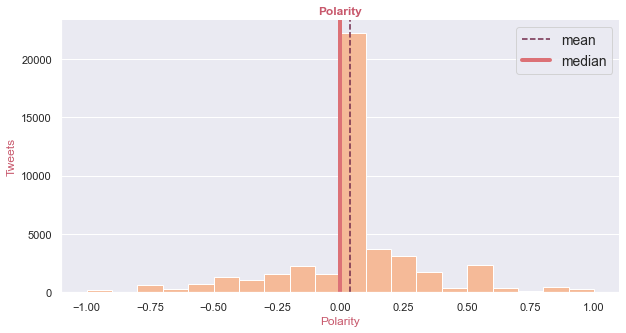

In [584]:
import matplotlib.pyplot as plt

#Check Polarity Sample

ax = tweets['polarity'].hist(bins=20, edgecolor='w', color='#f5ba98',  figsize=(10, 5))

# Here you can override the colors of set using rcParams by simply passing a value for the arguments.
ax.set_title('Polarity', color='#c8586c', fontweight='bold')
ax.set_xlabel('Polarity', color='#c8586c')
ax.set_ylabel('Tweets', color='#c8586c');

# To remove the spines of the chart manually, you can choose to set the visibility to False
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax.axvline(x=tweets['polarity'].mean(), color='#70284a', linestyle='--', label='mean')
ax.axvline(x=tweets['polarity'].median(), color='#dc7176', linewidth=4, label='median')
ax.legend(fontsize=14);



In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#sentiment = pd.pivot_table(tweets,index=['date'],columns = 'Candidate', aggfunc={'polarity':np.mean})


nonzero = tweets.query("polarity!=0")
sentiment = nonzero.groupby(['date','Candidate'])['polarity'].aggregate('mean').unstack()
sentiment





Candidate,Biden (Democrat),Trump (Republican)
date,,
08/28/2020,0.018425,0.066279
08/29/2020,0.059069,-0.115859
08/30/2020,0.137678,-0.040667
08/31/2020,0.108727,-0.034390
09/03/2020,0.046164,-0.016143
09/04/2020,-0.011229,0.005919
09/05/2020,0.130996,0.030688
09/06/2020,0.079013,0.014816


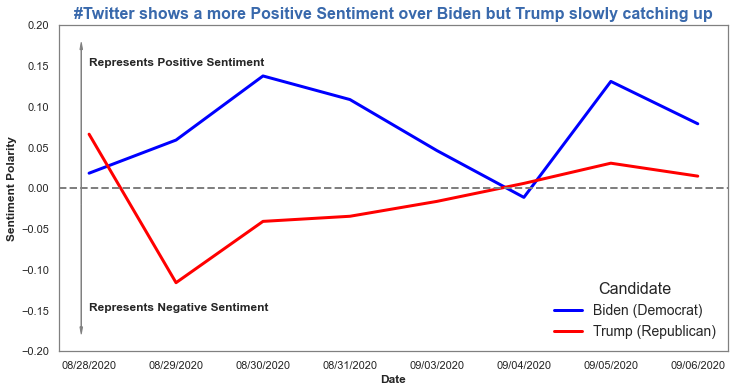

In [606]:
%matplotlib inline
import matplotlib.pyplot as plt

#if pivot chart
# axis_1 = tweets.pivot_table('polarity', index='date', columns='Candidate', aggfunc='mean').plot(figsize=(12, 6),
#                                                                                                 linewidth = 3)

fig = plt.figure(figsize=(12, 6))

axis_1 = sentiment['Biden (Democrat)'].plot(kind='line',color='blue',label="Biden (Democrat)", linewidth = 3)
axis_1 = sentiment['Trump (Republican)'].plot(kind='line',color='red',label="Trump (Republican)", linewidth = 3)

plt.ylabel('Sentiment Polarity',fontweight='bold')
plt.xlabel('Date',fontweight='bold')
plt.title('#Twitter shows a more Positive Sentiment over Biden but Trump slowly catching up', size = 16, color='#3969AC', fontweight='bold')
axis_1.legend(frameon=False, loc='lower right', fontsize = 14, title = "Candidate", title_fontsize = 16)
axis_1.set_facecolor('xkcd:white')
axis_1.spines['bottom'].set_color('0.5')
axis_1.spines['top'].set_color('0.5')
axis_1.spines['right'].set_color('0.5')
axis_1.spines['left'].set_color('0.5')
axis_1.set_ylim(-0.20,0.20)

axis_1.axhline(y=0, color='gray',linestyle='--', linewidth = 2)
plt.text(0, .15,'Represents Positive Sentiment', fontweight='bold', fontsize = 12)
plt.text(0, -.15,'Represents Negative Sentiment', fontweight='bold', fontsize = 12)
# P.arrow( x, y, dx, dy, **kwargs )
plt.arrow(-.09, -0.02, 0.0, -0.15, fc="gray", ec="gray",head_width=0.03, head_length=0.009)
plt.arrow(-.09, -0.02, 0.0, 0.19, fc="gray", ec="gray",head_width=0.03, head_length=0.009);





In [719]:
summary = tweets.groupby(['Candidate','Sentiment'])['count'].sum().unstack()
del summary['neutral']

summary.T 
summary.T / summary.sum(axis=1)

data = summary.T / summary.sum(axis=1) * 100
data.sort_values(by=['Sentiment'], inplace=True, ascending=False)
data

Candidate,Biden (Democrat),Trump (Republican)
Sentiment,,
positive,66.800841,55.053763
negative,33.199159,44.946237


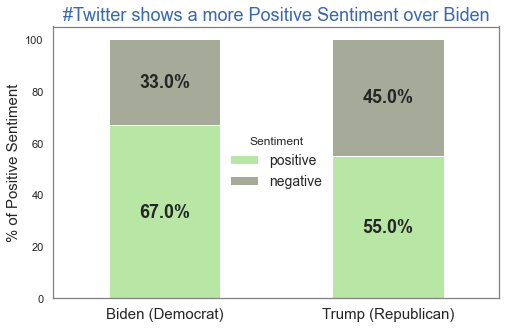

In [741]:
summary = tweets.groupby(['Candidate','Sentiment'])['count'].sum().unstack()
del summary['neutral']

summary.T 
summary.T / summary.sum(axis=1)

data = summary.T / summary.sum(axis=1) * 100
data.sort_values(by=['Sentiment'], inplace=True, ascending=False)
ax = data.T.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#b7e6a5','#A5AA99','#045275'])

ax.set_title('#Twitter shows a more Positive Sentiment over Biden', fontsize=18, color='#3969AC')
ax.set_xticklabels(['Biden (Democrat)', 'Trump (Republican)'], rotation=0, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('% of Positive Sentiment', fontsize=15)
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.set_facecolor('xkcd:white')
ax.legend(frameon=False, loc='center', fontsize = 14, title = "Sentiment", title_fontsize = 12)
ax.xaxis.grid(False)


labels = []
for i in data.index:
    for j in data.columns:
        label = str(round(data.loc[i][j],0))+ "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize = 18, fontweight='bold')
        
#E58606,#5D69B1,#52BCA3,#99C945,#CC61B0,#24796C,#DAA51B,#2F8AC4,#764E9F,#ED645A,#CC3A8E,#A5AA99